# HW4
## 1A.

In [11]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import colorednoise as cn
import torch 
import torch.nn as nn

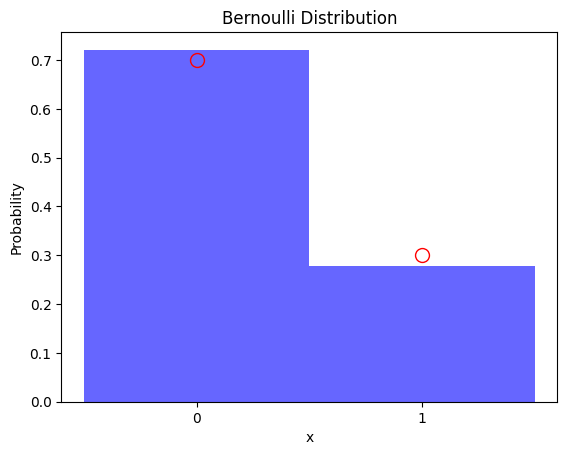

In [12]:
# Bernoulli Distribution
p = 0.3  # Probability of success
samples = 1000
bernoulli_samples = st.bernoulli.rvs(p, size=samples)

# Plot histogram
plt.figure()
plt.hist(bernoulli_samples, bins=[-0.5, 0.5,
         1.5], density=True, alpha=0.6, color='b')
plt.xticks([0, 1])
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution')

# PMF Overlay
x_vals = np.array([0, 1])
pdf_vals = st.bernoulli.pmf(x_vals, p)
plt.plot(x_vals, pdf_vals, 'ro', markersize=10, markerfacecolor='None')
plt.show()


### Bernoulli Distribution

The Bernoulli distribution is a discrete probability distribution of a random variable which takes value 1 with probability $p$ and 0 with probability $1-p$.

#### Formula:
$$
P(X = x) = p^x (1 - p)^{(1-x)}, \quad x \in \{0,1\}
$$
Where:
- $p$ is the probability of success.
- $x$ is the outcome (0 or 1).

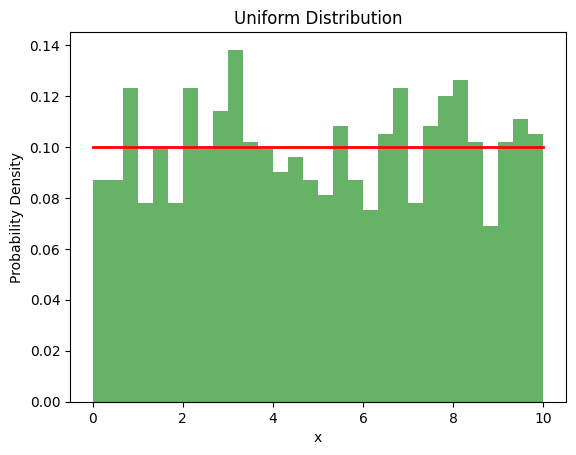

In [13]:
# Uniform Distribution
a, b = 0, 10  # Range
uniform_samples = np.random.uniform(a, b, samples)

plt.figure()
plt.hist(uniform_samples, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Uniform Distribution')

# PDF Overlay
x_vals = np.linspace(a, b, 1000)
pdf_vals = st.uniform.pdf(x_vals, loc=a, scale=b-a)
plt.plot(x_vals, pdf_vals, 'r', linewidth=2)
plt.show()

### Uniform Distribution

The uniform distribution is a probability distribution in which all outcomes are equally likely.

#### Formula:
$$
P(X=x) = \frac{1}{b-a}, \quad a \leq x \leq b
$$
Where:
- $a$ and $b$ are the minimum and maximum values of the distribution.

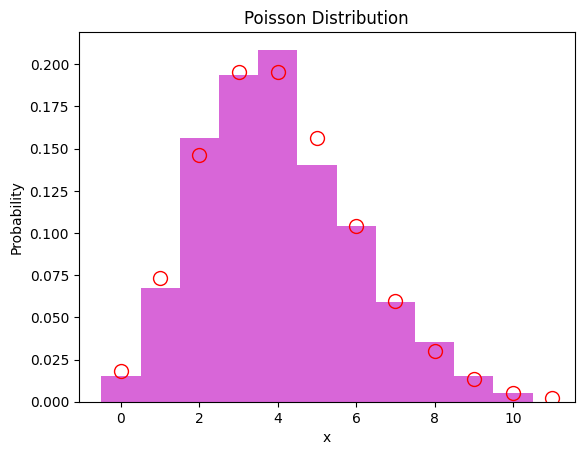

In [14]:
# Poisson Distribution
lambda_ = 4  # Mean of distribution
poisson_samples = st.poisson.rvs(lambda_, size=samples)

plt.figure()
plt.hist(poisson_samples, bins=np.arange(min(poisson_samples), max(
    poisson_samples)+1)-0.5, density=True, alpha=0.6, color='m')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Poisson Distribution')

# PMF Overlay
x_vals = np.arange(min(poisson_samples), max(poisson_samples)+1)
pdf_vals = st.poisson.pmf(x_vals, lambda_)
plt.plot(x_vals, pdf_vals, 'ro', markersize=10, markerfacecolor='None')
plt.show()

### Poisson Distribution

The Poisson distribution represents the number of events occurring in a fixed interval of time or space.

#### Formula:
$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \dots
$$
Where:
- $\lambda$ is the expected number of occurrences.

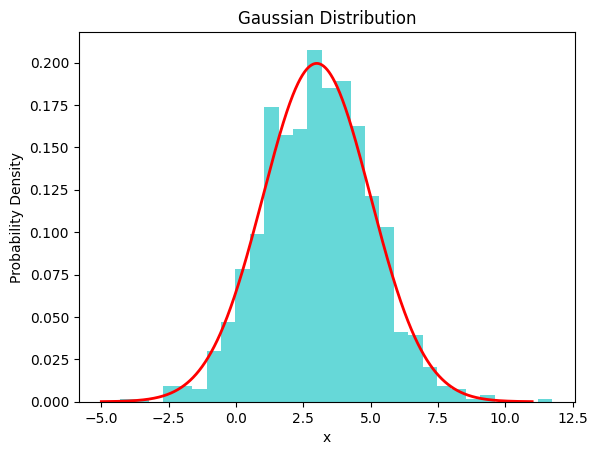

In [15]:
# Gaussian (Normal) Distribution
mu, sigma = 3, 2  # Mean and standard deviation
gaussian_samples = st.norm.rvs(loc=mu, scale=sigma, size=samples)

plt.figure()
plt.hist(gaussian_samples, bins=30, density=True, alpha=0.6, color='c')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution')

# PDF Overlay
x_vals = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf_vals = st.norm.pdf(x_vals, loc=mu, scale=sigma)
plt.plot(x_vals, pdf_vals, 'r', linewidth=2)
plt.show()

### Gaussian (Normal) Distribution

The normal distribution is a continuous probability distribution characterized by its bell shape.

#### Formula:
$$
P(X=x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
Where:
- $\mu$ is the mean (center) of the distribution.
- $\sigma$ is the standard deviation (spread of the distribution).

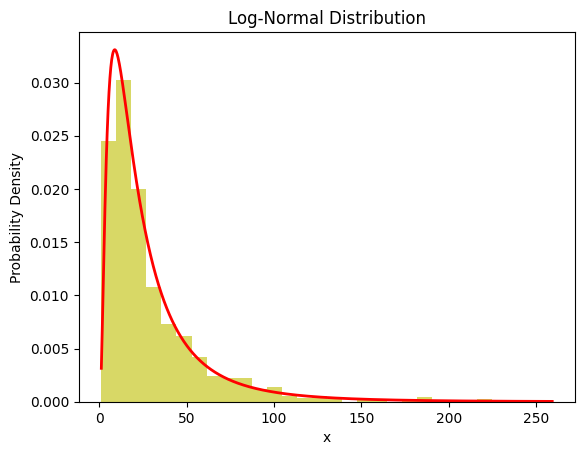

In [16]:
# Log-Normal Distribution
shape = 0.9  # Shape parameter
lognorm_samples = st.lognorm.rvs(s=shape, scale=np.exp(mu), size=samples)

plt.figure()
plt.hist(lognorm_samples, bins=30, density=True, alpha=0.6, color='y')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Log-Normal Distribution')

# PDF Overlay
x_vals = np.linspace(min(lognorm_samples), max(lognorm_samples), 1000)
pdf_vals = st.lognorm.pdf(x_vals, s=shape, scale=np.exp(mu))
plt.plot(x_vals, pdf_vals, 'r', linewidth=2)
plt.show()

### Log-Normal Distribution

A log-normal distribution is a probability distribution of a random variable whose logarithm is normally distributed.

#### Formula:
$$
P(X=x) = \frac{1}{x\sigma\sqrt{2\pi}} e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}}, \quad x > 0
$$
Where:
- $\mu$ and $\sigma$ are the mean and standard deviation of the normal distribution applied to the logarithm of $X$.

## 1B.

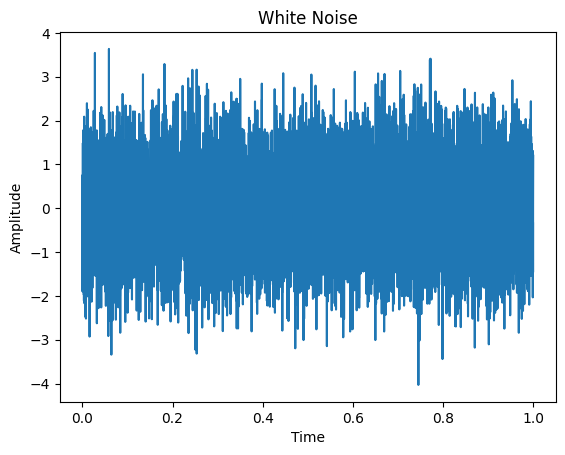

In [17]:
# White Noise
def generate_white_noise(samples: int) -> np.ndarray:
    return np.random.normal(0, 1, samples)


samples = 10000
white_noise = generate_white_noise(samples)

t = np.linspace(0, 1, samples)
plt.figure()
plt.plot(t, white_noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('White Noise')
plt.show()

### White Noise

White noise is a random signal having equal intensity at different frequencies, giving it a constant power spectral density.

#### Characteristics:
- Mean of zero.
- Constant power across all frequencies.

#### Equation:
$$
X(t) = W(t)
$$
Where:
- $W(t)$ is a stochastic process with constant power spectral density.

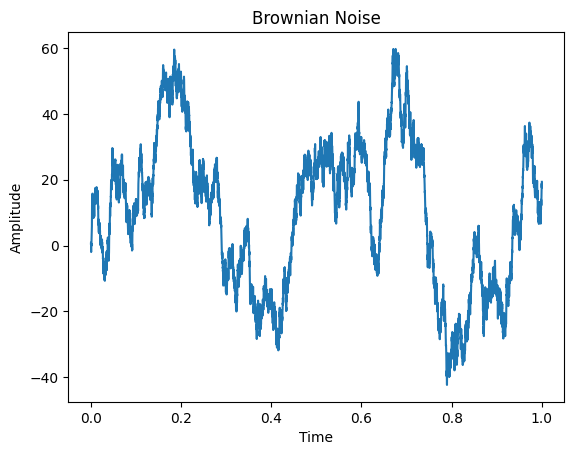

In [18]:
# Brownian Noise (Random Walk Noise)
def generate_brownian_noise(samples: int) -> np.ndarray:
    return np.cumsum(generate_white_noise(samples))


brownian_noise = generate_brownian_noise(samples)

plt.figure()
plt.plot(t, brownian_noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Brownian Noise')
plt.show()

### Brownian Noise

Brownian noise (or random walk noise) is obtained by integrating white noise, resulting in a $1/f^2$ power spectrum.

#### Characteristics:
- The sum of white noise over time.
- Stronger low-frequency components.

#### Equation:
$$
X(t) = \int W(t) dt
$$
Where:
- $W(t)$ is white noise.

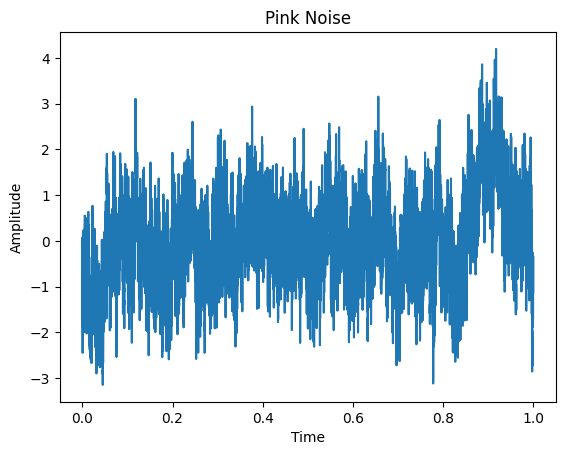

In [19]:
# Pink Noise
def generate_pink_noise(samples: int, beta: float = 1) -> np.ndarray:
    return cn.powerlaw_psd_gaussian(beta, samples)


pink_noise = generate_pink_noise(samples)

plt.figure()
plt.plot(t, pink_noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Pink Noise')
plt.show()

### Pink Noise

Pink noise follows a $1/f^\beta$ power spectrum, where $0 < \beta < 2$, making lower frequencies more pronounced than higher ones.

#### Characteristics:
- Power density decreases with frequency.
- Found in many natural and biological processes.

#### Equation:
$$
S(f) \propto \frac{1}{f^\beta}
$$
Where:
- $S(f)$ is the power spectral density.
- $f$ is the frequency.
- $\beta$ controls the decay rate.

## 2A.

## PyTorch Loss Functions

PyTorch provides various loss functions to measure the difference between predicted values and actual values. Some commonly used loss functions include:

1. **Mean Squared Error (MSE)** - Suitable for regression tasks, penalizes large errors more heavily.
2. **Mean Absolute Error (MAE)** - Also for regression, but treats all errors equally.
3. **Negative Log-Likelihood Loss (NLLLoss)** - Used in probabilistic classification problems.
4. **Cross-Entropy Loss (CELoss)** - Commonly used in multi-class classification problems.

## 2B.

### (i) When would you use MAE over MSE as a loss function for a regression problem?

Mean Absolute Error (MAE) and Mean Squared Error (MSE) are both used in regression problems, but they have different properties:
- **MSE (Mean Squared Error)**: 
  - Penalizes larger errors more heavily (because of squaring).
  - More sensitive to outliers.
  - Suitable when we want to emphasize larger errors.

- **MAE (Mean Absolute Error)**:
  - Treats all errors equally (linear penalty).
  - Less sensitive to outliers.
  - Preferred when outliers should not dominate the error measurement.

**Conclusion:** Use MAE when you expect outliers and don't want them to have excessive influence on the loss function.
"""

"""
### (ii) What is the difference between Negative Log-Likelihood loss (NLL) and Cross Entropy loss (CE)?

- **Negative Log-Likelihood Loss (NLLLoss)**:
  - Used in probabilistic models.
  - Requires input to be in log-probabilities (log-softmax output).
  - Typically used in conjunction with `torch.nn.functional.log_softmax`.

- **Cross-Entropy Loss (CE)**:
  - Combines softmax activation and NLLLoss into a single step.
  - Takes raw logits as input and internally applies `softmax` before computing the log-likelihood loss.
  - More convenient for multi-class classification tasks.

**Conclusion:** Cross-Entropy Loss is more commonly used because it simplifies implementation by integrating softmax activation directly into the loss calculation.